### https://www.youtube.com/watch?v=U2WnK0i_rOU&list=PLo9Vi5B84_dfAuwJqNYG4XhZMrGTF3sBx&index=3

In [2]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pl.read_csv(r'F:\DataSpell\Polars_library_learn\Youtube Lessons\Polars Tutorial\data\2019-Nov.csv')

### How to update columns and intro to window functions

In [4]:
df 

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"
…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:58 UTC""","""view""",15700137,2053013559733912211,null,null,277.74,532714000,"""02b4131c-0112-4231-aafa-ceaa08…"
"""2019-11-30 23:59:58 UTC""","""view""",28719425,2053013565639492569,"""apparel.shoes""","""baden""",62.81,545223467,"""734c5eef-0742-4f8b-9d22-48f75b…"
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…"


In [22]:
df_top = df

In [23]:
df.shape

(67501979, 9)

# 1. Update value on one ir multiple columns

In [24]:
# Update a string column
df_top.with_columns(
    ('brand-' + pl.col(['brand'])).alias('brand')
)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""brand-xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""brand-janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""brand-creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""brand-lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""brand-xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"
…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:58 UTC""","""view""",15700137,2053013559733912211,null,null,277.74,532714000,"""02b4131c-0112-4231-aafa-ceaa08…"
"""2019-11-30 23:59:58 UTC""","""view""",28719425,2053013565639492569,"""apparel.shoes""","""brand-baden""",62.81,545223467,"""734c5eef-0742-4f8b-9d22-48f75b…"
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""brand-samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…"


In [25]:
# Update a numeric column
df_top.with_columns([
    ('brand-' + pl.col('brand')).alias('brand2'),
    (pl.col('price') * 100).alias('price2')
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2,price2
str,str,i64,i64,str,str,f64,i64,str,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…","""brand-xiaomi""",48907.0
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…","""brand-janome""",29365.0
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…","""brand-creed""",2831.0
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…","""brand-lg""",71287.0
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…","""brand-xiaomi""",18327.0
…,…,…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:58 UTC""","""view""",15700137,2053013559733912211,null,null,277.74,532714000,"""02b4131c-0112-4231-aafa-ceaa08…",null,27774.0
"""2019-11-30 23:59:58 UTC""","""view""",28719425,2053013565639492569,"""apparel.shoes""","""baden""",62.81,545223467,"""734c5eef-0742-4f8b-9d22-48f75b…","""brand-baden""",6281.0
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…","""brand-samsung""",16703.0


In [26]:
df_top.select([
    ('brand-' + pl.col('brand')).alias('brand2'),
    (pl.col('price') * 100).alias('price2')
])

brand2,price2
str,f64
"""brand-xiaomi""",48907.0
"""brand-janome""",29365.0
"""brand-creed""",2831.0
"""brand-lg""",71287.0
"""brand-xiaomi""",18327.0
…,…
null,27774.0
"""brand-baden""",6281.0
"""brand-samsung""",16703.0


In [29]:
# create a column with a constant (based on the mean)
df_top.select([
    pl.all(),
    pl.col('price').mean().alias('price_avg')
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_avg
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",292.459317
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",292.459317
…,…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:58 UTC""","""view""",15700137,2053013559733912211,null,null,277.74,532714000,"""02b4131c-0112-4231-aafa-ceaa08…",292.459317
"""2019-11-30 23:59:58 UTC""","""view""",28719425,2053013565639492569,"""apparel.shoes""","""baden""",62.81,545223467,"""734c5eef-0742-4f8b-9d22-48f75b…",292.459317
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…",292.459317


# 2. Update values based on window functions
- In pandas this is done with transform.
- The idea is we update values of a column BY a group and the new column has the same size of the original column.
- The over() call defines the group we are interested in.  

In [32]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"


In [35]:
df.with_columns([
    pl.col('price').mean().over('category_code').alias('price by category')
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price by category
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",483.637803
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",244.516497
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",176.64639
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",340.601164
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",483.637803
…,…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:58 UTC""","""view""",15700137,2053013559733912211,null,null,277.74,532714000,"""02b4131c-0112-4231-aafa-ceaa08…",176.64639
"""2019-11-30 23:59:58 UTC""","""view""",28719425,2053013565639492569,"""apparel.shoes""","""baden""",62.81,545223467,"""734c5eef-0742-4f8b-9d22-48f75b…",89.073566
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…",483.637803


In [31]:
# not I can compute the difference between the price and the category averange.
df_cat_window = df.select([
    pl.col('category_code'),
    pl.col('price'),
    pl.col('price').mean().over('category_code').alias('price by category'),
    (pl.col('price') / pl.col('price').mean().over('category_code') -1).alias('price_div_cat_average')
])
df_cat_window

category_code,price,price by category,price_div_cat_average
str,f64,f64,f64
"""electronics.smartphone""",489.07,483.637803,0.011232
"""appliances.sewing_machine""",293.65,244.516497,0.200941
null,28.31,176.64639,-0.839736
"""appliances.kitchen.washer""",712.87,340.601164,1.092976
"""electronics.smartphone""",183.27,483.637803,-0.621059
…,…,…,…
null,277.74,176.64639,0.572294
"""apparel.shoes""",62.81,89.073566,-0.294853
"""electronics.smartphone""",167.03,483.637803,-0.654638


In [41]:
df_cat_window_sample = df_cat_window.sample(1000000).to_pandas() 

<Axes: >

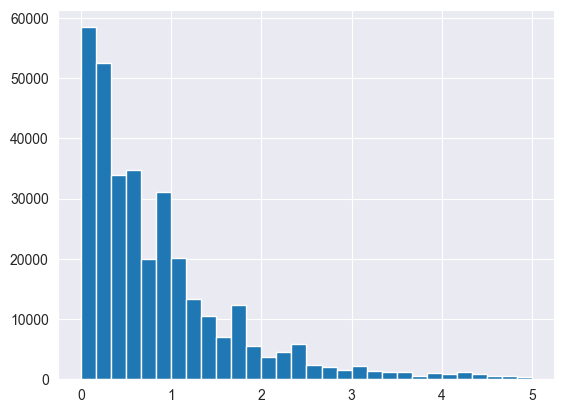

In [42]:
df_cat_window_sample['price_div_cat_average'].hist(bins=30, range=[0, 5])

In [44]:
df_cat_window_sample['price_div_cat_average'].quantile(np.arange(0, 1.1, 0.1))

0.0    -1.000000
0.1    -0.800043
0.2    -0.706079
0.3    -0.597033
0.4    -0.479132
0.5    -0.334849
0.6    -0.125066
0.7     0.106510
0.8     0.482433
0.9     1.061857
1.0    30.149060
Name: price_div_cat_average, dtype: float64

In [47]:
df_cat_window_sample[df_cat_window_sample.price_div_cat_average > 10].sort_values('price_div_cat_average', ascending=False)

,category_code,price,price by category,price_div_cat_average
940,appliances.environment.air_heater,1876.56,60.244515,30.149060
879292,appliances.environment.air_heater,1740.91,60.244515,27.897402
768116,appliances.environment.air_heater,1740.91,60.244515,27.897402
559379,appliances.environment.air_heater,1740.91,60.244515,27.897402
297730,computers.peripherals.mouse,893.55,34.095449,25.207310
...,...,...,...,...
943237,computers.peripherals.printer,2470.85,224.317950,10.014946
542562,computers.peripherals.printer,2470.85,224.317950,10.014946
24833,computers.peripherals.printer,2470.85,224.317950,10.014946
117309,computers.peripherals.printer,2470.85,224.317950,10.014946
